<a href="https://colab.research.google.com/github/molnaredom/melytanulas/blob/main/minta_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
import sklearn
import matplotlib.pyplot as plt

# Minta Projektmunka

Adatok letöltése és megvizsgálása.

Feladat megértése (osztályozás vagy regresszió, hány jellemzőm, osztályom van.)
 
 Milyen a felépítese a címkéknek - miként vannak kódolva? (diszkrét, folytonos, one-hot stb.)

Forrás: https://archive.ics.uci.edu/ml/datasets/Yeast

In [ ]:
import pandas as pd # A Pandas egy kiváló adatkezelő eszköz. Könnyen átvihető numpy tömbbé is.

# Adat forrása
url="https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"

# Adataink táblázata
c=pd.read_csv(url)

A .head() függvény hívásával bele tudunk nézni az első pár sorba. Jelen esetben nincs "header", így az 
adatok beolvasása után a további feldolgozásnál erre figyelnünk kell.

In [ ]:
c.head()

,ADT1_YEAST 0.58 0.61 0.47 0.13 0.50 0.00 0.48 0.22 MIT
0,ADT2_YEAST 0.43 0.67 0.48 0.27 0.50 0.00...
1,ADT3_YEAST 0.64 0.62 0.49 0.15 0.50 0.00...
2,AAR2_YEAST 0.58 0.44 0.57 0.13 0.50 0.00...
3,AATM_YEAST 0.42 0.44 0.48 0.54 0.50 0.00...
4,AATC_YEAST 0.51 0.40 0.56 0.17 0.50 0.50...


In [ ]:
# Látva az oszlopok nevét és az elválasztó karaktert újra beolvashatjuk az adatokat.
# Természetesen többféle megoldás is létezik erre a feladatra.

names = ['Sequence Name','mcg', 'gvh', 'alm', 'mit', 'erl','pox','vac','nuc']
dataset = pd.read_csv(url, names=names, delim_whitespace=True)
dataset.values[0]

array([0.58, 0.61, 0.47, 0.13, 0.5, 0.0, 0.48, 0.22, 'MIT'], dtype=object)

Láthatjuk, hogy az adatok már 0 és 1 közé lettek normalizálva.



In [ ]:
# Az első oszlop nem szükséges, az utolsó oszlop pedig az osztálycímkéket tartalmazza.
print(c.values[0])
dataset.values.shape

#c_df = pd.DataFrame(c)

['ADT2_YEAST  0.43  0.67  0.48  0.27  0.50  0.00  0.53  0.22  MIT']


(1484, 9)

In [ ]:
# Kiszedjük tömbökbe a jellemzőket és a címkéket
c_numpy_array_full = dataset.values
c_features = c_numpy_array_full[:,0:-1]
c_labels = c_numpy_array_full[:,-1]

Mivel a címkék szöveges formában vannak, átalakítjuk őket gépi tanulási algoritmusok számára kedvezőbb formára.

numpy.ndarray

Példa adatfeldolgozásra és SVM-re:

https://www.kaggle.com/mlwang32/sample-svm-model-for-mouse-protein-study

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert string labels to integers

c_labels[0]
le = LabelEncoder()
data_labels_encoded = le.fit_transform(c_labels)


In [ ]:
# Készíthetünk egy keverőfüggvényt, ami véletlenszerűen új sorrendet eredményez.

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

c_features, data_labels_encoded = unison_shuffled_copies(c_features, data_labels_encoded)

In [ ]:
# Convert integer labels to one-hot encoding

data_labels_encoded_ohe = np.reshape(data_labels_encoded,(-1,1))
ohe_enc = OneHotEncoder()
ohe_enc.fit(data_labels_encoded_ohe)
data_labels_encoded_ohe = ohe_enc.transform(data_labels_encoded_ohe).toarray()

# Osztályok száma
num_classes = data_labels_encoded_ohe.shape[1]

# Keras-os megoldás
 
# c_labels_ohe = keras.utils.to_categorical(data_labels_encoded) 
# c_labels_ohe


C:\Python36\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [ ]:
# Adatok szétválasztása

x_train = c_features[:int(c_features.shape[0]*0.8),:]
y_train = data_labels_encoded_ohe[:int(data_labels_encoded_ohe.shape[0]*0.8),:]
y_train_cat = data_labels_encoded[:int(data_labels_encoded_ohe.shape[0]*0.8)]

x_val = c_features[int(c_features.shape[0]*0.8):int(c_features.shape[0]*0.9),:]
y_val = data_labels_encoded_ohe[int(data_labels_encoded_ohe.shape[0]*0.8):int(data_labels_encoded_ohe.shape[0]*0.9),:]
y_val_cat = data_labels_encoded[int(data_labels_encoded.shape[0]*0.8):int(data_labels_encoded.shape[0]*0.9)]

x_test = c_features[int(data_labels_encoded_ohe.shape[0]*0.9):,:]
y_test = data_labels_encoded_ohe[int(data_labels_encoded_ohe.shape[0]*0.9):,:]
y_test_cat = data_labels_encoded[int(data_labels_encoded.shape[0]*0.9):]

In [ ]:
# Create SVM classifier and train
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)

train = clf.fit(x_train, y_train_cat)
train



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# Evaluate performance

# Train set
train_pred = clf.predict(x_train)
train_pred_scores = train_pred == y_train_cat
train_pred_scores = sum(train_pred_scores)
print("Train score: ", (train_pred_scores/x_train.shape[0])*100)

# Validation set
val_pred = clf.predict(x_val)
val_pred_scores = val_pred == y_val_cat
val_pred_scores = sum(val_pred_scores)
print("Val score: ", (val_pred_scores/x_val.shape[0])*100)

# Test set
test_pred = clf.predict(x_test)
test_pred_scores = test_pred == y_test_cat
test_pred_scores = sum(test_pred_scores)
print("Test score: ", (test_pred_scores/x_test.shape[0])*100)

Train score:  58.803706823925864
Val score:  57.432432432432435
Test score:  53.691275167785236


Keras - egyszerű hálózat

In [ ]:
#import keras


In [ ]:
# Készítsük el a hagyományos ('shallow') Artificial Neuronal Network-ünk (ANN)

model = keras.Sequential()

model.add(keras.layers.Dense(300, activation='sigmoid', input_shape=(c_features.shape[1],))) # O: activation='relu'
#model.add(keras.layers.Dense(300, activation='sigmoid'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=150,
                    verbose=0,
                    validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 300)               2700      
_________________________________________________________________
dense_70 (Dense)             (None, 10)                3010      
Total params: 5,710
Trainable params: 5,710
Non-trainable params: 0
_________________________________________________________________
Test loss: 1.1190853182901472
Test accuracy: 0.5436241612738411


Figyeljük meg a tanulás során kapott pontossági és veszteségi függvényeinket.
A két fenti grafikon alapján további optimalizációt végezhetünk.

     val_loss   val_acc      loss       acc  epoch
145  1.120231  0.540541  1.131955  0.570345    145
146  1.233724  0.425676  1.125178  0.578770    146
147  1.140149  0.554054  1.125434  0.569503    147
148  1.138096  0.513514  1.125817  0.575400    148
149  1.126158  0.520270  1.120527  0.556866    149


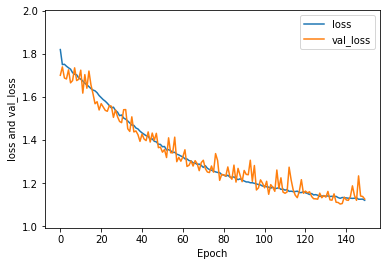

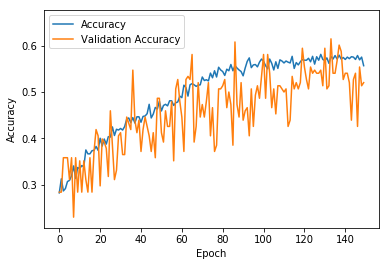

In [ ]:
# Loss és Acc görbék rajzolása matplotlib-bel

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss and val_loss')
    plt.plot(hist['epoch'], hist['loss'], label='loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'val_loss')
    plt.legend()
    plt.ylim([(min(hist['loss'].min(), hist['val_loss'].min()))*0.9,
              (max(hist['loss'].max(), hist['val_loss'].max()))*1.1])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],
           label='Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Validation Accuracy')
    plt.legend()
    plt.ylim([(min(hist['acc'].min(), hist['val_acc'].min()))*0.9,
              (max(hist['acc'].max(), hist['val_acc'].max()))*1.1])


plot_history(history)



Következő lépésben próbáljuk meg optimalizálni a tanítást és egy jobb hálóarchitektúrával
magasabb pontosságot elérni a teszt halmazon.

In [ ]:

model = keras.Sequential()

model.add(keras.layers.Dense(300, activation='relu', input_shape=(c_features.shape[1],))) # O: activation='relu'
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(300, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(300, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Állítsuk le a tanulást, ha X epoch óta nem javult a validóciós halmazon a hiba.
early_stopping = keras.callbacks.EarlyStopping(patience = 50)

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=300,
                    verbose=2,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 300)               2700      
_________________________________________________________________
dropout_15 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_16 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_17 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 10)                3010      
Total para

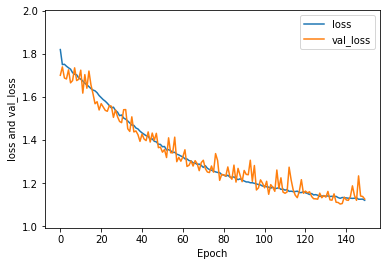

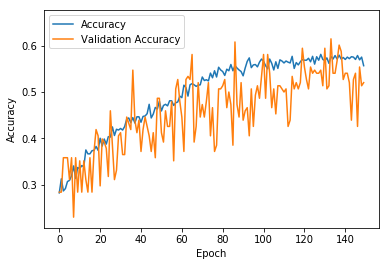

In [ ]:
plot_history(history)

Próbáljuk meg megtalálni a megfelelő nagyságú tanulási rátát.
A 'Grid Search' módszer segítségével kis mértékben változtatva 1 paramétert keresünk 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 300)               2700      
_________________________________________________________________
dropout_30 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_31 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_32 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 10)                3010      
Total para

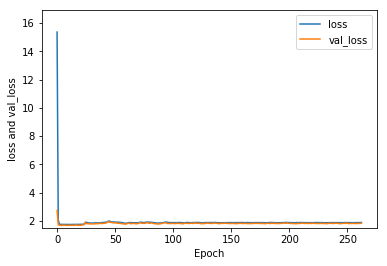

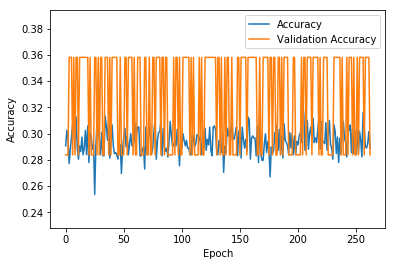

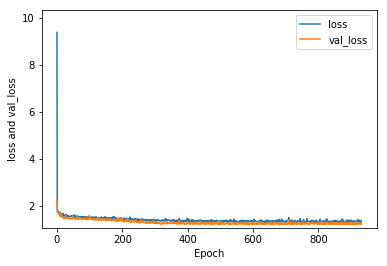

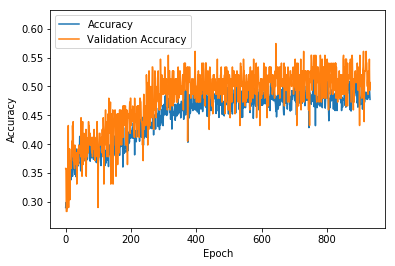

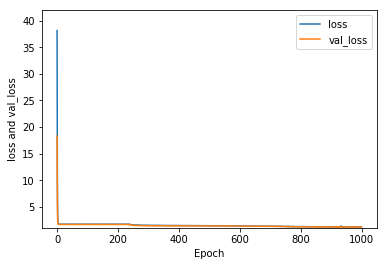

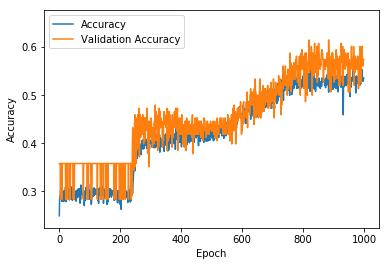

In [ ]:
# Készítsük el a paraméter kereséséhez szükséges változóinkat.
# Egy inkrementálható érték és egy tároló tömb szükséges.
learning_rate_base = 0.1
grid_search_result_lr = np.array(["Test acc.", "Val. acc.", "Train acc.", "LR"], ndmin=2)

for i in range(3):
    
    
    model = keras.Sequential()
    
    model.add(keras.layers.Dense(300, activation='relu', input_shape=(c_features.shape[1],))) # O: activation='relu'
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(300, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(300, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    
    model.summary()
    
    model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate_base),
              metrics=['accuracy'])

    # Állítsuk le a tanulást, ha X epoch óta nem javult a validóciós halmazon a hiba.
    early_stopping = keras.callbacks.EarlyStopping(patience = 250)
    
    history = model.fit(x_train, y_train,
                        batch_size=32,
                        epochs=1000,
                        verbose=2,
                        validation_data=(x_val, y_val),
                        callbacks=[early_stopping])
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    
    # A "history" és a "hist" objektumok tárolják a modellünket és a tanítási értékeket
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    grid_search_result_lr_newline = [[score[1], hist['val_acc'].values[-1], hist['acc'].values[-1], learning_rate_base]]
    grid_search_result_lr = np.append(grid_search_result_lr, grid_search_result_lr_newline, axis=0)
    learning_rate_base = learning_rate_base * 0.1
    plot_history(history)

In [ ]:
df_gs = pd.DataFrame(grid_search_result_lr)
df_gs
#grid_search_result_lr

,0,1,2,3
0,Test acc.,Val. acc.,Train acc.,LR
1,0.2751677857349383,0.28378378539472016,0.2889637742207245,0.1
2,0.4697986583181676,0.5067567583676931,0.4776748104465038,0.010000000000000002
3,0.5503355744701104,0.5743243235188562,0.535804549283909,0.0010000000000000002


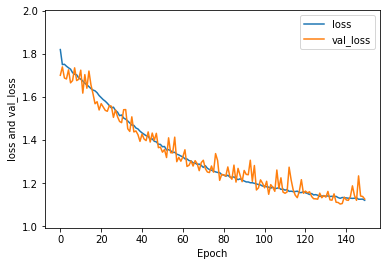

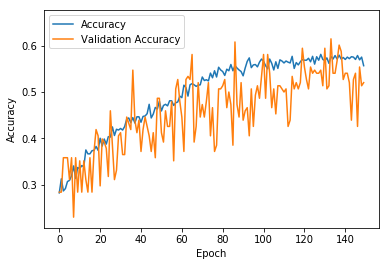

In [ ]:
plot_history(history) #[-1,1]

In [ ]:
type(hist['val_acc'])

pandas.core.series.Series